# Activity: Explore sampling

## Introduction
In this activity, you will engage in effective sampling of a dataset in order to make it easier to analyze. As a data professional you will often work with extremely large datasets, and utilizing proper sampling techniques helps you improve your efficiency in this work. 

For this activity, you are a member of an analytics team for the Environmental Protection Agency. You are assigned to analyze data on air quality with respect to carbon monoxide—a major air pollutant—and report your findings. The data utilized in this activity includes information from over 200 sites, identified by their state name, county name, city name, and local site name. You will use effective sampling within this dataset. 

## Step 1: Imports

### Import packages

Import `pandas`,  `numpy`, `matplotlib`, `statsmodels`, and `scipy`. 

In [29]:
# Import libraries and packages

### YOUR CODE HERE ###
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sim
import scipy.stats as stats

### Load the dataset

As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [30]:
# RUN THIS CELL TO IMPORT YOUR DATA.

### YOUR CODE HERE ###
epa_data = pd.read_csv("c4_epa_air_quality.csv", index_col = 0) #chunksize to get the pandas dataframe in sections

# chunksize to get the pandas dataframe in sections


<details>
  <summary><h4>Hint 1</h4></summary>

Use the function in the `pandas` library that allows you to read in data from a csv file and load it into a DataFrame. 

</details>

<details>
  <summary><h4>Hint 2</h4></summary>

Use the `read_csv` function from the pandas `library`. Set the `index_col` parameter to `0` to read in the first column as an index (and to avoid `"Unnamed: 0"` appearing as a column in the resulting Dataframe).

</details>

## Step 2: Data exploration

### Examine the data

To understand how the dataset is structured, examine the first 10 rows of the data.

In [31]:
# First 10 rows of the data

### YOUR CODE HERE ###
epa_data.head(10)

,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,arithmetic_mean,aqi
0,2018-01-01,Arizona,Maricopa,Buckeye,BUCKEYE,Carbon monoxide,Parts per million,0.473684,7
1,2018-01-01,Ohio,Belmont,Shadyside,Shadyside,Carbon monoxide,Parts per million,0.263158,5
2,2018-01-01,Wyoming,Teton,Not in a city,Yellowstone National Park - Old Faithful Snow ...,Carbon monoxide,Parts per million,0.111111,2
3,2018-01-01,Pennsylvania,Philadelphia,Philadelphia,North East Waste (NEW),Carbon monoxide,Parts per million,0.300000,3
4,2018-01-01,Iowa,Polk,Des Moines,CARPENTER,Carbon monoxide,Parts per million,0.215789,3
5,2018-01-01,Hawaii,Honolulu,Not in a city,Kapolei,Carbon monoxide,Parts per million,0.994737,14
6,2018-01-01,Hawaii,Honolulu,Not in a city,Kapolei,Carbon monoxide,Parts per million,0.200000,2
7,2018-01-01,Pennsylvania,Erie,Erie,NaN,Carbon monoxide,Parts per million,0.200000,2
8,2018-01-01,Hawaii,Honolulu,Honolulu,Honolulu,Carbon monoxide,Parts per million,0.400000,5
9,2018-01-01,Colorado,Larimer,Fort Collins,Fort Collins - CSU - S. Mason,Carbon monoxide,Parts per million,0.300000,6


<details>
  <summary><h4><strong> Hint 1 </STRONG></h4></summary>

Use the function in the `pandas` library that allows you to get a specific number of rows from the top of a DataFrame. 

</details>

<details>
  <summary><h4><strong> Hint 2 </STRONG></h4></summary>

Use the `head` function from the `pandas` library. Set the `n` parameter to `10` to print out the first 10 rows.

</details>

**Question:** What does the `aqi` column represent?

[Write your response here. Double-click (or enter) to edit.]

### Generate a table of descriptive statistics

Generate a table of some descriptive statistics about the data. Specify that all columns of the input be included in the output.

In [32]:
### YOUR CODE HERE ###
epa_data.describe()

,arithmetic_mean,aqi
count,260.000000,260.000000
mean,0.403169,6.757692
std,0.317902,7.061707
min,0.000000,0.000000
25%,0.200000,2.000000
50%,0.276315,5.000000
75%,0.516009,9.000000
max,1.921053,50.000000


<details>
  <summary><h4>Hint 1</h4></summary>

Use function in the `pandas` library that allows you to generate a table of basic descriptive statistics in a DataFrame.

</details>

<details>
  <summary><h4>Hint 2</h4></summary>

Use the `describe` function from the `pandas` library. Set the `include` parameter passed in to this function to 'all' to specify that all columns of the input be included in the output.

</details>

**Question:** Based on the preceding table of descriptive statistics, what is the mean value of the `aqi` column? 

# The mean value of aqi column is 6.757692

**Question:** Based on the preceding table of descriptive statistics, what do you notice about the count value for the `aqi` column?

# the value count of aqi column is 260

### Use the `mean()` function on the `aqi`  column

Now, use the `mean()` function on the `aqi`  column and assign the value to a variable `population_mean`. The value should be the same as the one generated by the `describe()` method in the above table. 

In [33]:
### YOUR CODE HERE ###
population_mean=epa_data['aqi'].mean()
population_mean

6.757692307692308

<details>
  <summary><h4><strong> Hint 1 </STRONG></h4></summary>

Use the function in the `pandas` library that allows you to generate a mean value for a column in a DataFrame.

</details>

<details>
  <summary><h4><strong> Hint 2 </STRONG></h4></summary>

Use the `mean()` method.

</details>

## Step 3: Statistical tests

### Sample with replacement

First, name a new variable `sampled_data`. Then, use the `sample()` dataframe method to draw 50 samples from `epa_data`. Set `replace` equal to `'True'` to specify sampling with replacement. For `random_state`, choose an arbitrary number for random seed. Make that arbitrary number `42`.

In [34]:
### YOUR CODE HERE ###
sampled_data=epa_data.sample(n=50,replace=True,random_state=156)
sampled_data

,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,arithmetic_mean,aqi
44,2018-01-01,Virginia,Arlington,Arlington,Aurora Hills Visitors Center,Carbon monoxide,Parts per million,0.352632,5
204,2018-01-01,Colorado,Weld,Greeley,Greeley - Weld County Tower,Carbon monoxide,Parts per million,0.231579,3
63,2018-01-01,California,Sacramento,Not in a city,North Highlands-Blackfoot,Carbon monoxide,Parts per million,0.836842,18
10,2018-01-01,Minnesota,Dakota,Rosemount,Flint Hills Refinery 420,Carbon monoxide,Parts per million,0.247368,3
63,2018-01-01,California,Sacramento,Not in a city,North Highlands-Blackfoot,Carbon monoxide,Parts per million,0.836842,18
258,2018-01-01,Nebraska,Douglas,Omaha,NaN,Carbon monoxide,Parts per million,0.421053,9
55,2018-01-01,West Virginia,Kanawha,Charleston,NaN,Carbon monoxide,Parts per million,0.226316,3
48,2018-01-01,Florida,Hillsborough,Tampa,Munro Street (Near-Road),Carbon monoxide,Parts per million,0.347368,6
190,2018-01-01,California,Madera,Madera,Madera-Pump Yard,Carbon monoxide,Parts per million,0.347368,5
62,2018-01-01,California,Alameda,Oakland,Laney College,Carbon monoxide,Parts per million,0.611111,9


### Output the first 10 rows

Output the first 10 rows of the DataFrame. 

In [35]:
### YOUR CODE HERE ###
sampled_data.head(10)

,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,arithmetic_mean,aqi
44,2018-01-01,Virginia,Arlington,Arlington,Aurora Hills Visitors Center,Carbon monoxide,Parts per million,0.352632,5
204,2018-01-01,Colorado,Weld,Greeley,Greeley - Weld County Tower,Carbon monoxide,Parts per million,0.231579,3
63,2018-01-01,California,Sacramento,Not in a city,North Highlands-Blackfoot,Carbon monoxide,Parts per million,0.836842,18
10,2018-01-01,Minnesota,Dakota,Rosemount,Flint Hills Refinery 420,Carbon monoxide,Parts per million,0.247368,3
63,2018-01-01,California,Sacramento,Not in a city,North Highlands-Blackfoot,Carbon monoxide,Parts per million,0.836842,18
258,2018-01-01,Nebraska,Douglas,Omaha,NaN,Carbon monoxide,Parts per million,0.421053,9
55,2018-01-01,West Virginia,Kanawha,Charleston,NaN,Carbon monoxide,Parts per million,0.226316,3
48,2018-01-01,Florida,Hillsborough,Tampa,Munro Street (Near-Road),Carbon monoxide,Parts per million,0.347368,6
190,2018-01-01,California,Madera,Madera,Madera-Pump Yard,Carbon monoxide,Parts per million,0.347368,5
62,2018-01-01,California,Alameda,Oakland,Laney College,Carbon monoxide,Parts per million,0.611111,9


<details>
  <summary><h4><strong> Hint 1 </STRONG></h4></summary>

Use the function in the `pandas` library that allows you to get a specific number of rows from the top of a DataFrame. 

</details>

<details>
  <summary><h4><strong> Hint 2 </STRONG></h4></summary>

Use the `head` function from the `pandas` library. Set the `n` parameter to `10` to print out the first 10 rows.

</details>

**Question:** In the DataFrame output, why is the row index 102 repeated twice? 

# epa_data sample is taken using the replace=true parameter as it is specified that 
# replacment is true so the sample will take the values more than once and 
# the replace, which means that rows of the sample can be repeated as 
# this is repeated sampling the same sample value can be taken more than once
# if the replace=false parameter is specified sampling will not take values more 
# than once so each value in a sample will be unique 


**Question:** What does `random_state` do?

# random state has the number with specified seed value and if the value is 
# given the random number generator will select those specific values 
# and the starting point of the same value will be selected along with all the other values will be selected and the number with sepecified seed value is changed then the sample data will not have the same random value and the values within the sample data is changed  so the values will have different sample data  or the sample data values is chagned 

### Compute the mean value from the `aqi` column

Compute the mean value from the `aqi` column in `sampled_data` and assign the value to the variable `sample_mean`.

In [36]:
### YOUR CODE HERE ###
sample_mean=sampled_data['aqi'].mean()
sampled_data

,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,arithmetic_mean,aqi
44,2018-01-01,Virginia,Arlington,Arlington,Aurora Hills Visitors Center,Carbon monoxide,Parts per million,0.352632,5
204,2018-01-01,Colorado,Weld,Greeley,Greeley - Weld County Tower,Carbon monoxide,Parts per million,0.231579,3
63,2018-01-01,California,Sacramento,Not in a city,North Highlands-Blackfoot,Carbon monoxide,Parts per million,0.836842,18
10,2018-01-01,Minnesota,Dakota,Rosemount,Flint Hills Refinery 420,Carbon monoxide,Parts per million,0.247368,3
63,2018-01-01,California,Sacramento,Not in a city,North Highlands-Blackfoot,Carbon monoxide,Parts per million,0.836842,18
258,2018-01-01,Nebraska,Douglas,Omaha,NaN,Carbon monoxide,Parts per million,0.421053,9
55,2018-01-01,West Virginia,Kanawha,Charleston,NaN,Carbon monoxide,Parts per million,0.226316,3
48,2018-01-01,Florida,Hillsborough,Tampa,Munro Street (Near-Road),Carbon monoxide,Parts per million,0.347368,6
190,2018-01-01,California,Madera,Madera,Madera-Pump Yard,Carbon monoxide,Parts per million,0.347368,5
62,2018-01-01,California,Alameda,Oakland,Laney College,Carbon monoxide,Parts per million,0.611111,9


 **Question:**  Why is `sample_mean` different from `population_mean`?


# sample_mean is different from population_mean is because of sampling variability as the sampling variability the sample mean will be equal to the population mean and hence they are different, but with most frequent observed
# sample mean of the sampling distribution of the sample means will be 
# equal that of the population mean

### Apply the central limit theorem

Imagine repeating the the earlier sample with replacement 10,000 times and obtaining 10,000 point estimates of the mean. In other words, imagine taking 10,000 random samples of 50 AQI values and computing the mean for each sample. According to the **central limit theorem**, the mean of a sampling distribution should be roughly equal to the population mean. Complete the following steps to compute the mean of the sampling distribution with 10,000 samples. 

* Create an empty list and assign it to a variable called `estimate_list`. 
* Iterate through a `for` loop 10,000 times. To do this, make sure to utilize the `range()` function to generate a sequence of numbers from 0 to 9,999. 
* In each iteration of the loop, use the `sample()` function to take a random sample (with replacement) of 50 AQI values from the population. Do not set `random_state` to a value.
* Use the list `append()` function to add the value of the sample `mean` to each item in the list.


In [38]:
### YOUR CODE HERE ###
estimate_list=[]
for i in range(10000):
    estimate_list.append(sampled_data['aqi'].sample(n=50,replace=True).mean())
estimate_list


[8.46,
 8.5,
 8.52,
 9.7,
 5.94,
 6.6,
 9.8,
 6.32,
 7.14,
 7.6,
 7.68,
 5.56,
 7.46,
 6.64,
 8.38,
 6.5,
 7.14,
 6.52,
 7.74,
 6.82,
 8.24,
 8.44,
 6.58,
 6.48,
 7.06,
 6.52,
 7.52,
 8.62,
 8.52,
 8.04,
 7.22,
 7.92,
 7.36,
 6.0,
 5.02,
 6.52,
 7.7,
 6.8,
 7.1,
 7.9,
 8.48,
 6.54,
 7.04,
 8.2,
 7.36,
 8.56,
 9.28,
 7.36,
 6.54,
 7.1,
 7.86,
 5.94,
 6.16,
 6.92,
 5.68,
 8.26,
 7.96,
 8.26,
 7.74,
 6.8,
 8.18,
 5.8,
 6.68,
 7.66,
 7.36,
 7.12,
 7.38,
 7.14,
 8.76,
 7.06,
 6.22,
 8.26,
 7.2,
 8.68,
 7.38,
 7.38,
 7.66,
 6.24,
 7.06,
 8.34,
 7.38,
 7.68,
 6.8,
 7.86,
 6.9,
 7.08,
 7.02,
 7.2,
 7.68,
 9.04,
 9.94,
 6.42,
 7.68,
 5.02,
 6.46,
 7.96,
 9.3,
 5.92,
 7.1,
 6.2,
 8.66,
 6.66,
 6.74,
 5.6,
 6.9,
 7.28,
 8.76,
 7.18,
 5.84,
 7.76,
 5.68,
 8.3,
 6.5,
 7.58,
 7.94,
 6.48,
 9.68,
 10.48,
 8.46,
 7.04,
 8.24,
 7.98,
 7.6,
 8.1,
 7.88,
 7.6,
 7.52,
 8.1,
 6.14,
 7.2,
 5.12,
 6.66,
 7.26,
 8.24,
 7.2,
 8.54,
 7.9,
 7.0,
 5.88,
 9.8,
 7.28,
 5.34,
 8.6,
 6.82,
 10.78,
 6.48,
 7.76,
 6.94

<details>
  <summary><h4><strong> Hint 1 </STRONG></h4></summary>

Review [the content about sampling in Python](https://www.coursera.org/learn/the-power-of-statistics/lecture/SNOE0/sampling-distributions-with-python). 

</details>

### Create a new DataFrame

Next, create a new DataFrame from the list of 10,000 estimates. Name the new variable `estimate_df`.

In [39]:
### YOUR CODE HERE ###
estimate_df=pd.DataFrame({'estimate':estimate_list})
estimate_df

,estimate
0,8.46
1,8.50
2,8.52
3,9.70
4,5.94
...,...
9995,8.10
9996,6.14
9997,8.04
9998,5.88


<details>
  <summary><h4><strong> Hint 1 </STRONG></h4></summary>

Review [the content about sampling in Python](https://www.coursera.org/learn/the-power-of-statistics/lecture/SNOE0/sampling-distributions-with-python). 

</details>

<details>
<summary><h4><strong> Hint 2 </STRONG></h4></summary>

Use the `mean()` function.

</details>

### Compute the mean() of the sampling distribution

Next, compute the `mean()` of the sampling distribution of 10,000 random samples and store the result in a new variable `mean_sample_means`.

In [40]:
### YOUR CODE HERE ###
mean_sample_means=estimate_df.mean()
mean_sample_means

estimate    7.577608
dtype: float64

<details>
  <summary><h4><strong> Hint 1 </STRONG></h4></summary>

Use the function in the `pandas` library that allows you to generate a mean value for a column in a DataFrame.

</details>

<details>
  <summary><h4><strong> Hint 2 </STRONG></h4></summary>

Use the `mean()` function.

</details>

**Question:** What is the mean for the sampling distribution of 10,000 random samples?

# mean_sample_means is 7.5777 is the mean of the sampling distribution of the sample means

<details>
  <summary><h4><strong> Hint 3 </STRONG></h4></summary>

This value is contained in `mean_sample_means`.

</details>

<details>
  <summary><h4><strong> Hint 4 </STRONG></h4></summary>

According to the central limit theorem, the mean of the preceding sampling distribution should be roughly equal to the population mean. 

</details>

**Question:** How are the central limit theorem and random sampling (with replacement) related?

# if we take multiple random samples with replacement the sampling distribution 
# of the sample means taken from the random samples and the mean of that
# sampling distribution will be approximately equal to the population mean

### Output the distribution using a histogram

Output the distribution of these estimates using a histogram. This provides an idea of the sampling distribution.

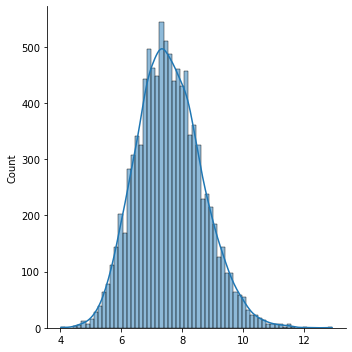

In [44]:
### YOUR CODE HERE 
import seaborn as sns
sns.displot(estimate_list,kde=True)

<details>
  <summary><h4><strong> Hint 1 </STRONG></h4></summary>

Use the `hist()` function. 

</details>

### Calculate the standard error

Calculate the standard error of the mean AQI using the initial sample of 50. The **standard error** of a statistic measures the sample-to-sample variability of the sample statistic. It provides a numerical measure of sampling variability and answers the question: How far is a statistic based on one particular sample from the actual value of the statistic?

In [49]:
### YOUR CODE HERE ###
standard_error=np.std(estimate_list)
standard_error

1.077516310009273

<details>
  <summary><h4><strong> Hint 1 </STRONG></h4></summary>

Use the `std()` function and the `np.sqrt()` function.

</details>

## Step 4: Results and evaluation

###  Visualize the relationship between the sampling and normal distributions

Visualize the relationship between your sampling distribution of 10,000 estimates and the normal distribution.

1. Plot a histogram of the 10,000 sample means 
2. Add a vertical line indicating the mean of the first single sample of 50
3. Add another vertical line indicating the mean of the means of the 10,000 samples 
4. Add a third vertical line indicating the mean of the actual population

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

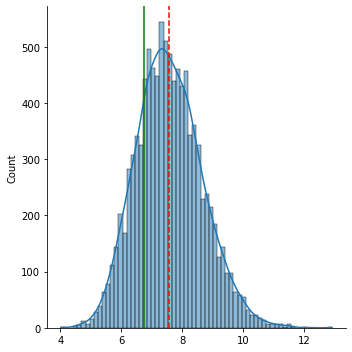

In [54]:
 ### YOUE CODE HERE ###
sns.displot(estimate_list,kde=True)
plt.axvline(x=population_mean, color='g', linestyle = 'solid', label = 'population mean')
plt.axvline(x=sample_mean, color='r', linestyle = '--', label = 'sample mean of the first random sample')
plt.axvline(x=mean_sample_means, color='b', linestyle = ':', label = 'mean of sample means of 10000 random samples')
plt.title("Sampling distribution of sample mean")
plt.xlabel('sample mean')
plt.ylabel('density')

**Question:** What insights did you gain from the preceding sampling distribution?

# Considerations

**What are some key takeaways that you learned from this lab?**

**What findings would you share with others?**

**What would you convey to external stakeholders?**




**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.